In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('StudentPerformanceFactors.csv')
print(df.head())

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

In [ ]:
df = df.dropna()
print(df.isnull().sum())

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


In [ ]:
# Split features and target
X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']

# Encode categorical features using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split full dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model on full dataset
model_full = LinearRegression()
model_full.fit(X_train, y_train)

# Predict on test set
y_pred_full = model_full.predict(X_test)


Full Linear Regression Performance:
MSE: 4.17
R^2: 0.73


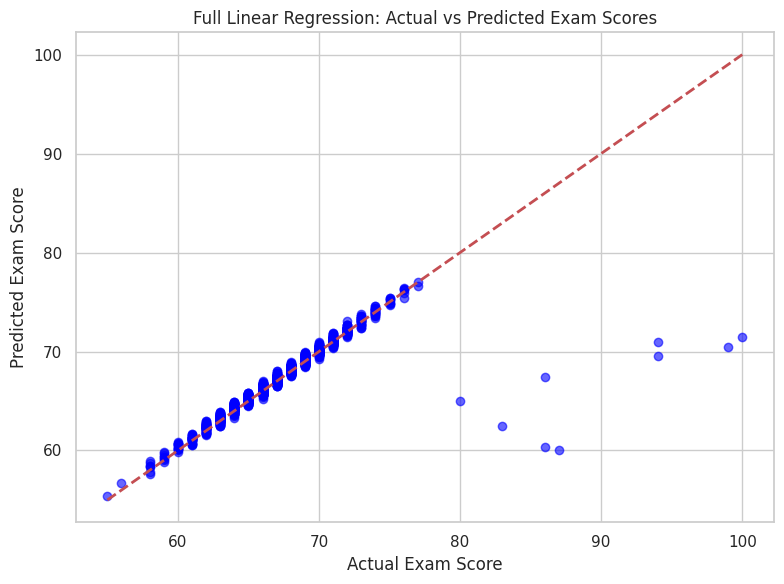

In [ ]:
# Evaluate full linear regression model
mse_full = mean_squared_error(y_test, y_pred_full)
r2_full = r2_score(y_test, y_pred_full)
print(f"\nFull Linear Regression Performance:")
print(f"MSE: {mse_full:.2f}")
print(f"R^2: {r2_full:.2f}")

# Visualize Actual vs Predicted for full model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_full, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Full Linear Regression: Actual vs Predicted Exam Scores')
plt.tight_layout()
plt.show()

In [ ]:
features_subset = ['Hours_Studied', 'Sleep_Hours', 'Attendance']

X_subset = df[features_subset]
y_subset = df['Exam_Score']

X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)

In [ ]:
# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_sub)
X_test_poly = poly.transform(X_test_sub)

# Train polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_sub)

# Predict and evaluate polynomial regression
y_pred_poly = poly_model.predict(X_test_poly)
mse_poly = mean_squared_error(y_test_sub, y_pred_poly)
r2_poly = r2_score(y_test_sub, y_pred_poly)

print(f"Polynomial Regression (degree 2) MSE: {mse_poly:.2f}")
print(f"Polynomial Regression (degree 2) R^2: {r2_poly:.2f}")

Polynomial Regression (degree 2) MSE: 7.03
Polynomial Regression (degree 2) R^2: 0.55


Linear Regression on subset MSE: 7.02
Linear Regression on subset R^2: 0.55


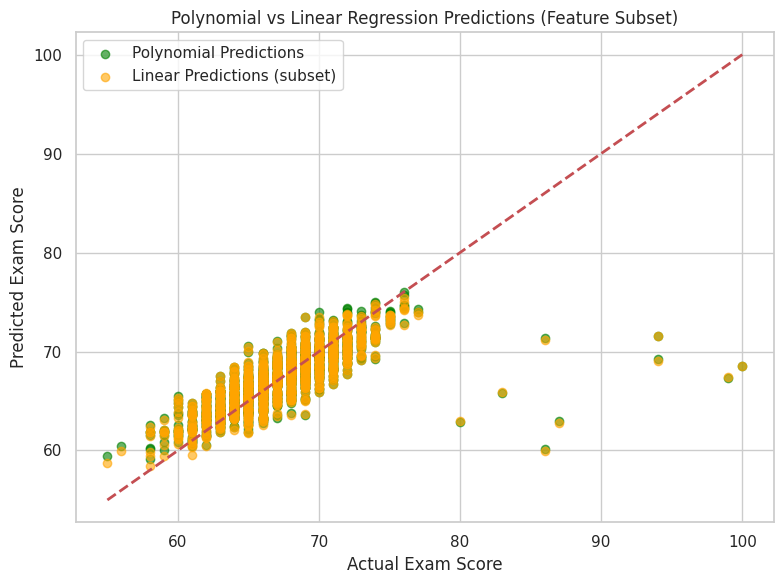

In [ ]:
linear_model_subset = LinearRegression()
linear_model_subset.fit(X_train_sub, y_train_sub)
y_pred_linear_sub = linear_model_subset.predict(X_test_sub)

mse_linear_sub = mean_squared_error(y_test_sub, y_pred_linear_sub)
r2_linear_sub = r2_score(y_test_sub, y_pred_linear_sub)

print(f"Linear Regression on subset MSE: {mse_linear_sub:.2f}")
print(f"Linear Regression on subset R^2: {r2_linear_sub:.2f}")

# Visualization for polynomial regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test_sub, y_pred_poly, color='green', alpha=0.6, label='Polynomial Predictions')
plt.scatter(y_test_sub, y_pred_linear_sub, color='orange', alpha=0.6, label='Linear Predictions (subset)')
plt.plot([y_test_sub.min(), y_test_sub.max()], [y_test_sub.min(), y_test_sub.max()], 'r--', lw=2)
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Polynomial vs Linear Regression Predictions (Feature Subset)')
plt.legend()
plt.tight_layout()
plt.show()